
Model Performansları:

Linear Regression: MSE = 665.7483, R^2 = 0.7327
KNN: MSE = 855.0954, R^2 = 0.6567
Decision Tree: MSE = 1113.9659, R^2 = 0.5527
Random Forest: MSE = 940.1229, R^2 = 0.6225
SVR: MSE = 1217.7253, R^2 = 0.5111
Gradient Boosting: MSE = 857.6235, R^2 = 0.6556

En iyi model:  LinearRegression()
En iyi R^2 skoru: 0.7327
En iyi model 'eniyi_regresyon_model.joblib' dosyasına kaydedildi.


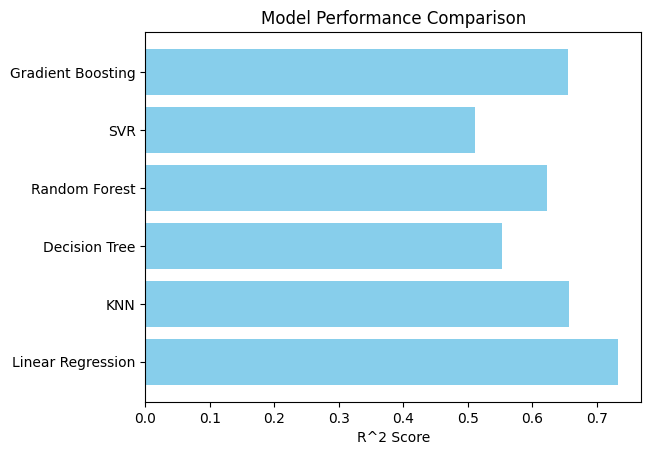


Sample Prediction: [405.875]


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Model listesi
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=42)
}

# Modellerin eğitimi ve performansının değerlendirilmesi
best_model = None
best_score = float('-inf')  # R^2 için negatif sonsuz
model_scores = []

print("\nModel Performansları:\n")
for name, model in models.items():
    # Pipeline oluşturma
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    
    # Model eğitimi
    pipeline.fit(X_train, y_train)
    
    # Test seti üzerinde tahmin
    y_pred = pipeline.predict(X_test)
    
    # Performans metrikleri
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores.append((name, r2))
    print(f"{name}: MSE = {mse:.4f}, R^2 = {r2:.4f}")
    
    # En iyi modelin seçimi
    if r2 > best_score:
        best_score = r2
        best_model = pipeline

# En iyi modelin bilgisi
print("\nEn iyi model: ", best_model.named_steps['regressor'])
print(f"En iyi R^2 skoru: {best_score:.4f}")

# En iyi modeli kaydetme
model_filename = 'eniyi.joblib'
joblib.dump(best_model, model_filename)
print(f"En iyi model '{model_filename}' dosyasına kaydedildi.")

# Model performanslarını görselleştirme
model_names, scores = zip(*model_scores)
plt.barh(model_names, scores, color='skyblue')
plt.xlabel('R^2 Score')
plt.title('Model Performance Comparison')
plt.show()

# Kaydedilen modeli yükleme ve test etme
if os.path.exists(model_filename):
    loaded_model = joblib.load(model_filename)
    sample = X_test.iloc[0:1]  # Test setinden bir örnek
    predicted = loaded_model.predict(sample)
    print(f"\nSample Prediction: {predicted}")
else:
    print(f"Model dosyası bulunamadı: {model_filename}")
